In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import warnings
%matplotlib inline

# Open data

In [7]:
#Open Data, it is already clean.
df=pd.read_csv('Loan_clean_data.csv')
warnings.filterwarnings('ignore')
df.head()

,loan_amnt,term,emp_length,annual_inc,loan_status
0,3600.0,36,10,55000.0,1
1,24700.0,36,10,65000.0,1
2,20000.0,60,10,63000.0,1
3,10400.0,60,3,104433.0,1
4,11950.0,36,4,34000.0,1


In [9]:
#Separate the dataset in dependent an independent variable
X= df.drop('loan_status',axis=1)
y=df['loan_status']

# Correlation Beetwen Variables

,loan_amnt,term,emp_length,annual_inc
loan_amnt,1.000000,0.377807,0.089391,0.304917
term,0.377807,1.000000,0.055466,0.044038
emp_length,0.089391,0.055466,1.000000,0.066329
annual_inc,0.304917,0.044038,0.066329,1.000000


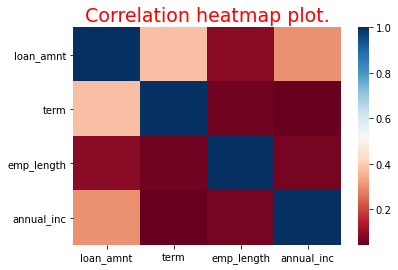

In [31]:
corr=X.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
plt.title('Correlation heatmap plot.', fontsize=19,  color='red')
plt.show()

# Split Train and Test Data

In [10]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [22]:
y_test

39450      1
960369     1
692050     1
1039108    0
1150222    1
          ..
351123     0
506248     0
66828      1
998178     0
801302     1
Name: loan_status, Length: 316700, dtype: int64

In [23]:
X_test

,loan_amnt,term,emp_length,annual_inc
39450,20000.0,36,2,91000.0
960369,21000.0,60,10,55660.0
692050,2000.0,36,3,18500.0
1039108,9500.0,36,4,28000.0
1150222,9800.0,36,3,45000.0
...,...,...,...,...
351123,14400.0,36,0,72000.0
506248,16000.0,36,5,60000.0
66828,27000.0,60,10,84000.0
998178,3000.0,36,4,60000.0


# Apply Standard Scaling 

In [7]:
#Standard Scaling 
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)
X_train[:1]

array([[-0.29698141,  1.7489461 ,  1.09292296, -0.2382464 ]])

# 3.3.1 Neural Network Model

In [10]:
#Neural Network
nn=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=200)
nn.fit(X_train,y_train)
pred_nn=nn.predict(X_test)

In [51]:
print(classification_report(y_test,pred_nn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     61782
           1       0.80      1.00      0.89    254918

    accuracy                           0.80    316700
   macro avg       0.40      0.50      0.45    316700
weighted avg       0.65      0.80      0.72    316700



In [61]:
accuracy_score(y_test,pred_nn)

0.8049194821597726

# 3.3.2 Random Forest Classifier Model

In [54]:
#Random Forest Classifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)

In [55]:
#Test Model
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.29      0.10      0.15     61782
           1       0.81      0.94      0.87    254918

    accuracy                           0.78    316700
   macro avg       0.55      0.52      0.51    316700
weighted avg       0.71      0.78      0.73    316700



In [60]:
accuracy_score(y_test,pred_rfc)

0.7761509314808968

# 3.3.3 Decision Tree Model

In [12]:
# Decision Tree
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)

In [58]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.26      0.15      0.19     61782
           1       0.81      0.89      0.85    254918

    accuracy                           0.75    316700
   macro avg       0.54      0.52      0.52    316700
weighted avg       0.71      0.75      0.72    316700



In [59]:
accuracy_score(y_test,pred_dt)

0.7498863277549732

# 3.3.4 Logistic Regression Model

In [13]:
#Logistic Regression
model = LogisticRegression()
scaler = MinMaxScaler()
pipeline = Pipeline([('scaler', scaler), ('model', model)])
pipeline.fit(X_train, y_train)
pred_model=pipeline.predict(X_test)


In [14]:
print(classification_report(y_test,pred_model))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     61782
           1       0.80      1.00      0.89    254918

    accuracy                           0.80    316700
   macro avg       0.40      0.50      0.45    316700
weighted avg       0.65      0.80      0.72    316700



In [15]:
accuracy_score(y_test,pred_model)

0.8049194821597726

#Support Vector Model (Takes too long)

# 3.3.5 Support Vector Machine

In [20]:
#Support Vector Model
svm_= svm.SVC()
svm_.fit(X_train,y_train)
pred_svm_=svm_.predict(X_test)

In [21]:
print(classification_report(y_test,pred_svm_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     61782
           1       0.80      1.00      0.89    254918

    accuracy                           0.80    316700
   macro avg       0.40      0.50      0.45    316700
weighted avg       0.65      0.80      0.72    316700



In [22]:
accuracy_score(y_test,pred_svm_)

0.8049163245974108